# Can Freedom Predict Happiness? 

## Data Analysis and Machine Learning Exploration

Using Data fron the Human Freedom Index and the Happiness Index, I attempted to answer the question whether freedom measures correlate with happiness measures in a way that can be predicted, or at least provide actionable information.

### PROJECT STEPS:
##### • Data Prep

##### • Feature Selection

##### • Correlation + Residual Plots

##### • Regression + Scoring: SKLearn and Train/Test/Split

##### • Regression + Scoring: Keras and TensorFlow

##### • Clustering and Forecasting in Tableau


### DATA SOURCES:
#### HAPPINESS DATASET:

World Happiness Report (2019)
https://worldhappiness.report/ed/2019/

World Happiness Report data on Kaggle
Includes happiness scores and rankings from the Gallup World Poll
https://www.kaggle.com/unsdsn/world-happiness  

#### AND TWO MERGED DATASETS on HUMAN FREEDOM:

Human Freedom Index from the Cato Institute
Includes the basic freedom scores and rankings
https://www.cato.org/human-freedom-index-new

Human Freedom Index exploration on Kaggle
Breaks Cato data into smaller subsets for more detailed study:
https://www.kaggle.com/gsutters/the-human-freedom-index#hfi_cc_2018.csv

### LIBRARIES USED:

In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# For feature selection: univariate selection:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

# For feature selection: feature importance
from sklearn.ensemble import ExtraTreesClassifier

# For feature selection: correlation matrix
import seaborn as sns

# For feature importance using XG Boost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

# For linear regression model + scoring with SKLearn: 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For scaling data (think I didn't use Label Encoder or to_categorical?)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# For regression with Keras and TensorFlow:
from keras import backend as K
# model that contains all our forward and back layering 
from tensorflow.keras.models import Sequential 
# model that defines nodes
from tensorflow.keras.layers import Dense

## DATA PREP:
#### IMPORT DATASETS:

In [135]:
# import human freedom index:
human_freedom_df = pd.read_csv("kaggle.csv")
human_freedom_df.head()

,year,ISO_code,Country,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [136]:
happiness_df = pd.read_csv("happiness.csv")
happiness_df.head()

,Country,Happiness score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488


#### TRANSFORM: REPLACE NAN VALUES WITH COLUMN MEAN + MERGE DATASETS:

In [137]:
# remove NaN values:
human_freedom_df.fillna(human_freedom_df.mean(), inplace=True)

hf_no_nan_df = human_freedom_df.fillna(0)
hf_no_nan_df.head()

,year,ISO_code,Country,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,5.589355,5.474770,5.044070,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,5.589355,5.474770,5.044070,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,5.589355,5.474770,5.044070,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [138]:
# merge datasets on "Country" column
freedom_and_happiness = pd.merge(hf_no_nan_df,happiness_df, on="Country")
freedom_and_happiness.head()

,year,ISO_code,Country,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile,Happiness score
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0,4.719
1,2015,ALB,Albania,Eastern Europe,6.108121,4.802975,4.583263,5.164786,9.096927,10.0,...,7.324944,7.074366,6.733388,7.035655,7.53,34.0,7.558539,49.0,2.0,4.719
2,2014,ALB,Albania,Eastern Europe,5.569809,5.041787,4.302964,4.971520,8.397686,10.0,...,7.194431,5.998270,6.424354,6.954481,7.48,38.0,7.615083,47.0,2.0,4.719
3,2013,ALB,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,8.300775,10.0,...,7.194431,5.998270,6.244828,6.624514,7.27,53.0,7.389597,53.0,2.0,4.719
4,2012,ALB,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,7.849344,10.0,...,7.698494,5.998270,5.967623,6.619162,7.20,59.0,7.435191,54.0,2.0,4.719


#### SAVE DATAFRAME AS CSV TO ACCESS LATER:

In [140]:
# save dataframe to csv to access later
freedom_and_happiness.to_csv('combined_data.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## FEATURE SELECTION: which features best to use?

### 1. Univariate Selection: SelectKBest
##### Finding Top 10 Best Features using SelectKBest class (selects those features that have the strongest relationship with the output variable, "Happiness Score")
The SKlearn library provides the SelectKBest class that can be used with a suite of different statistical tests. The example below uses the chi-squared (chi²) test for to select 10 of the best features from the combined dataset, using "Happiness Score" as the y value.

In [142]:
# plot for univariate selection
# drop string columns and "combined score" columns as well as output variable:

X = freedom_and_happiness.drop(columns=['year', 'ISO_code', 'Country', 'region','hf_score',
                              'hf_rank', 'ef_score', 'pf_score', 'ef_rank', 'pf_rank', 'hf_quartile', 'Happiness score'
                              ]) #hf_no_nan_df.iloc[:,5:20]  #independent columns
y = freedom_and_happiness['Happiness score']#.iloc[:,3]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Freedom Category (pf = personal, ef = economic)','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


   Freedom Category (pf = personal, ef = economic)        Score
3                                           pf_rol  1230.578752
66                                        ef_legal   889.096243
99                   ef_regulation_business_bribes   684.532473
0                                pf_rol_procedural   657.558458
78                             ef_trade_regulatory   633.735130
58                             ef_legal_protection   606.950920
59                               ef_legal_military   599.032929
84                                        ef_trade   593.664575
56                               ef_legal_judicial   584.099815
34                         pf_expression_influence   518.702052


### Display the same output as a dataframe:
Interestingly, this feature select method shows that the majority of relevant features relate to economic freedoms (7/10) rather than personal freedoms (3/10), which is the same conclusion we reached in Project 1 in the original exploration of this data.


In [143]:
featureScores.nlargest(10, 'Score')

,"Freedom Category (pf = personal, ef = economic)",Score
3,pf_rol,1230.578752
66,ef_legal,889.096243
99,ef_regulation_business_bribes,684.532473
0,pf_rol_procedural,657.558458
78,ef_trade_regulatory,633.735130
58,ef_legal_protection,606.950920
59,ef_legal_military,599.032929
84,ef_trade,593.664575
56,ef_legal_judicial,584.099815
34,pf_expression_influence,518.702052


### 2. Score for Feature Importance: Extra Trees Classifier
Another type of feature selection can be done with SKLearn's Extra Trees Classifier. This classifier extracts the top 10 features of the dataset: the higher the score the more important/relevant is the feature towards the output variable.

In [145]:
# plot feature importance
X = freedom_and_happiness.drop(columns=['year', 'ISO_code', 'Country', 'region','hf_score',
                              'hf_rank', 'ef_score', 'pf_score', 'ef_rank', 'pf_rank', 'Happiness score'
                              ]) #hf_no_nan_df.iloc[:,5:20]  #independent columns
y = freedom_and_happiness['Happiness score']#.iloc[:,3]    #target column i.e price range


X = hf_no_nan_df.iloc[:,5:20]  #independent columns
y = hf_no_nan_df.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### THE KIND OF RESULT I WAS LOOKING FOR:

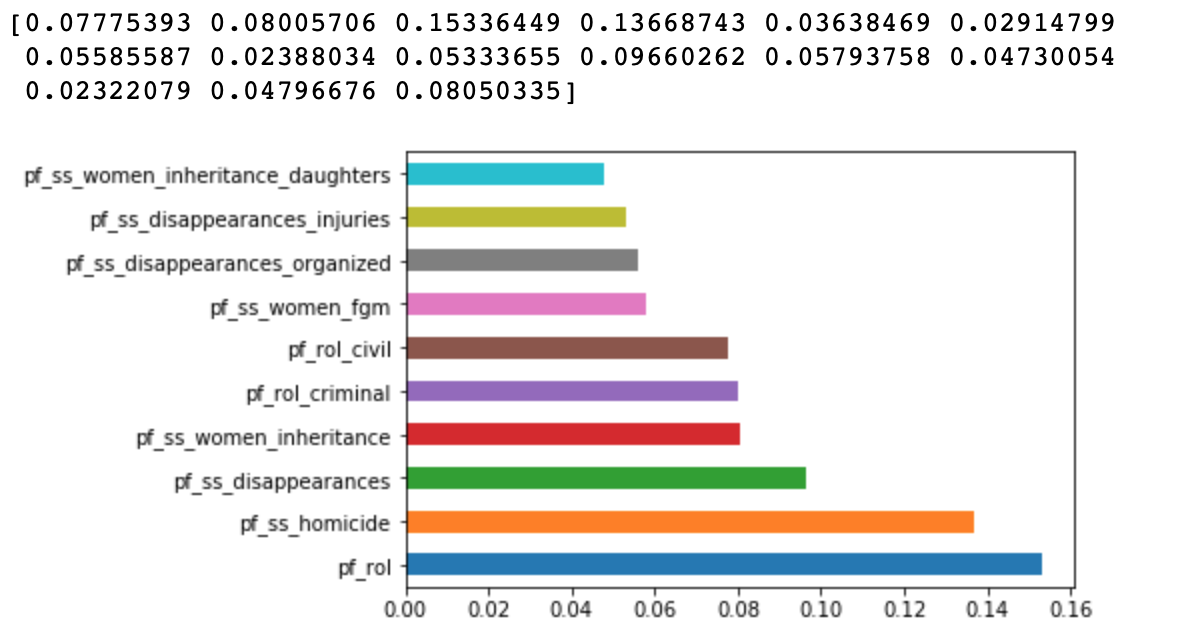

### 3. Plot a Heatmap Correlation Matrix using the Seaborn Library
#### Third type of feature selection: correlation reveals which features are most related to each other and/or to the target variable, "Happiness score". Shows both positive (green) and negative (red) correlations.

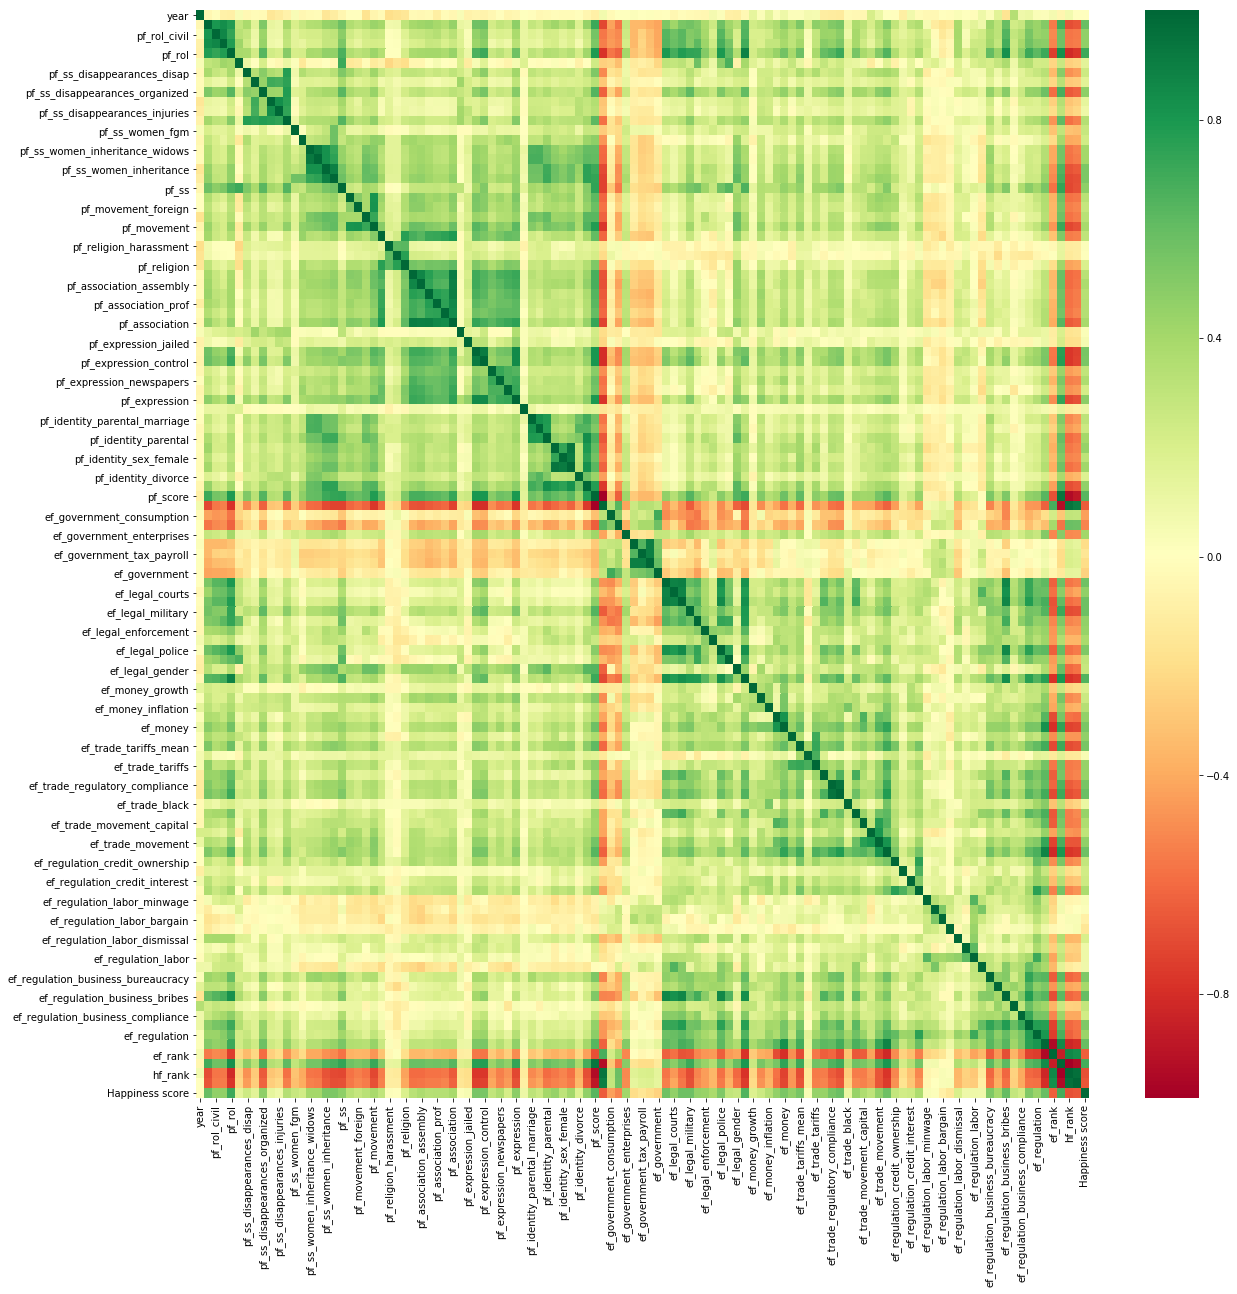

In [146]:
# plot correlation matrix with heatmap
# data = pd.read_csv("kaggle.csv")
X = freedom_and_happiness.drop(columns=['year', 'ISO_code', 'Country', 'region','hf_score',
                              'hf_rank', 'ef_score', 'pf_score', 'ef_rank', 'pf_rank', 'Happiness score'
                              ]).iloc[:,0:20]  #independent columns
y = freedom_and_happiness['Happiness score']#.iloc[:,3]    #target column i.e price range


# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,0]    #target column i.e price range
#get correlations of each features in dataset
corrmat = freedom_and_happiness.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(freedom_and_happiness[top_corr_features].corr(),annot=False,cmap="RdYlGn")

### 4.  Feature selection with XGBoost:
In place of the Extra Trees Classifier since it didn't work (yet), here used feature importance calculated by XGBoost (Gradient booster) to perform feature selection.
https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

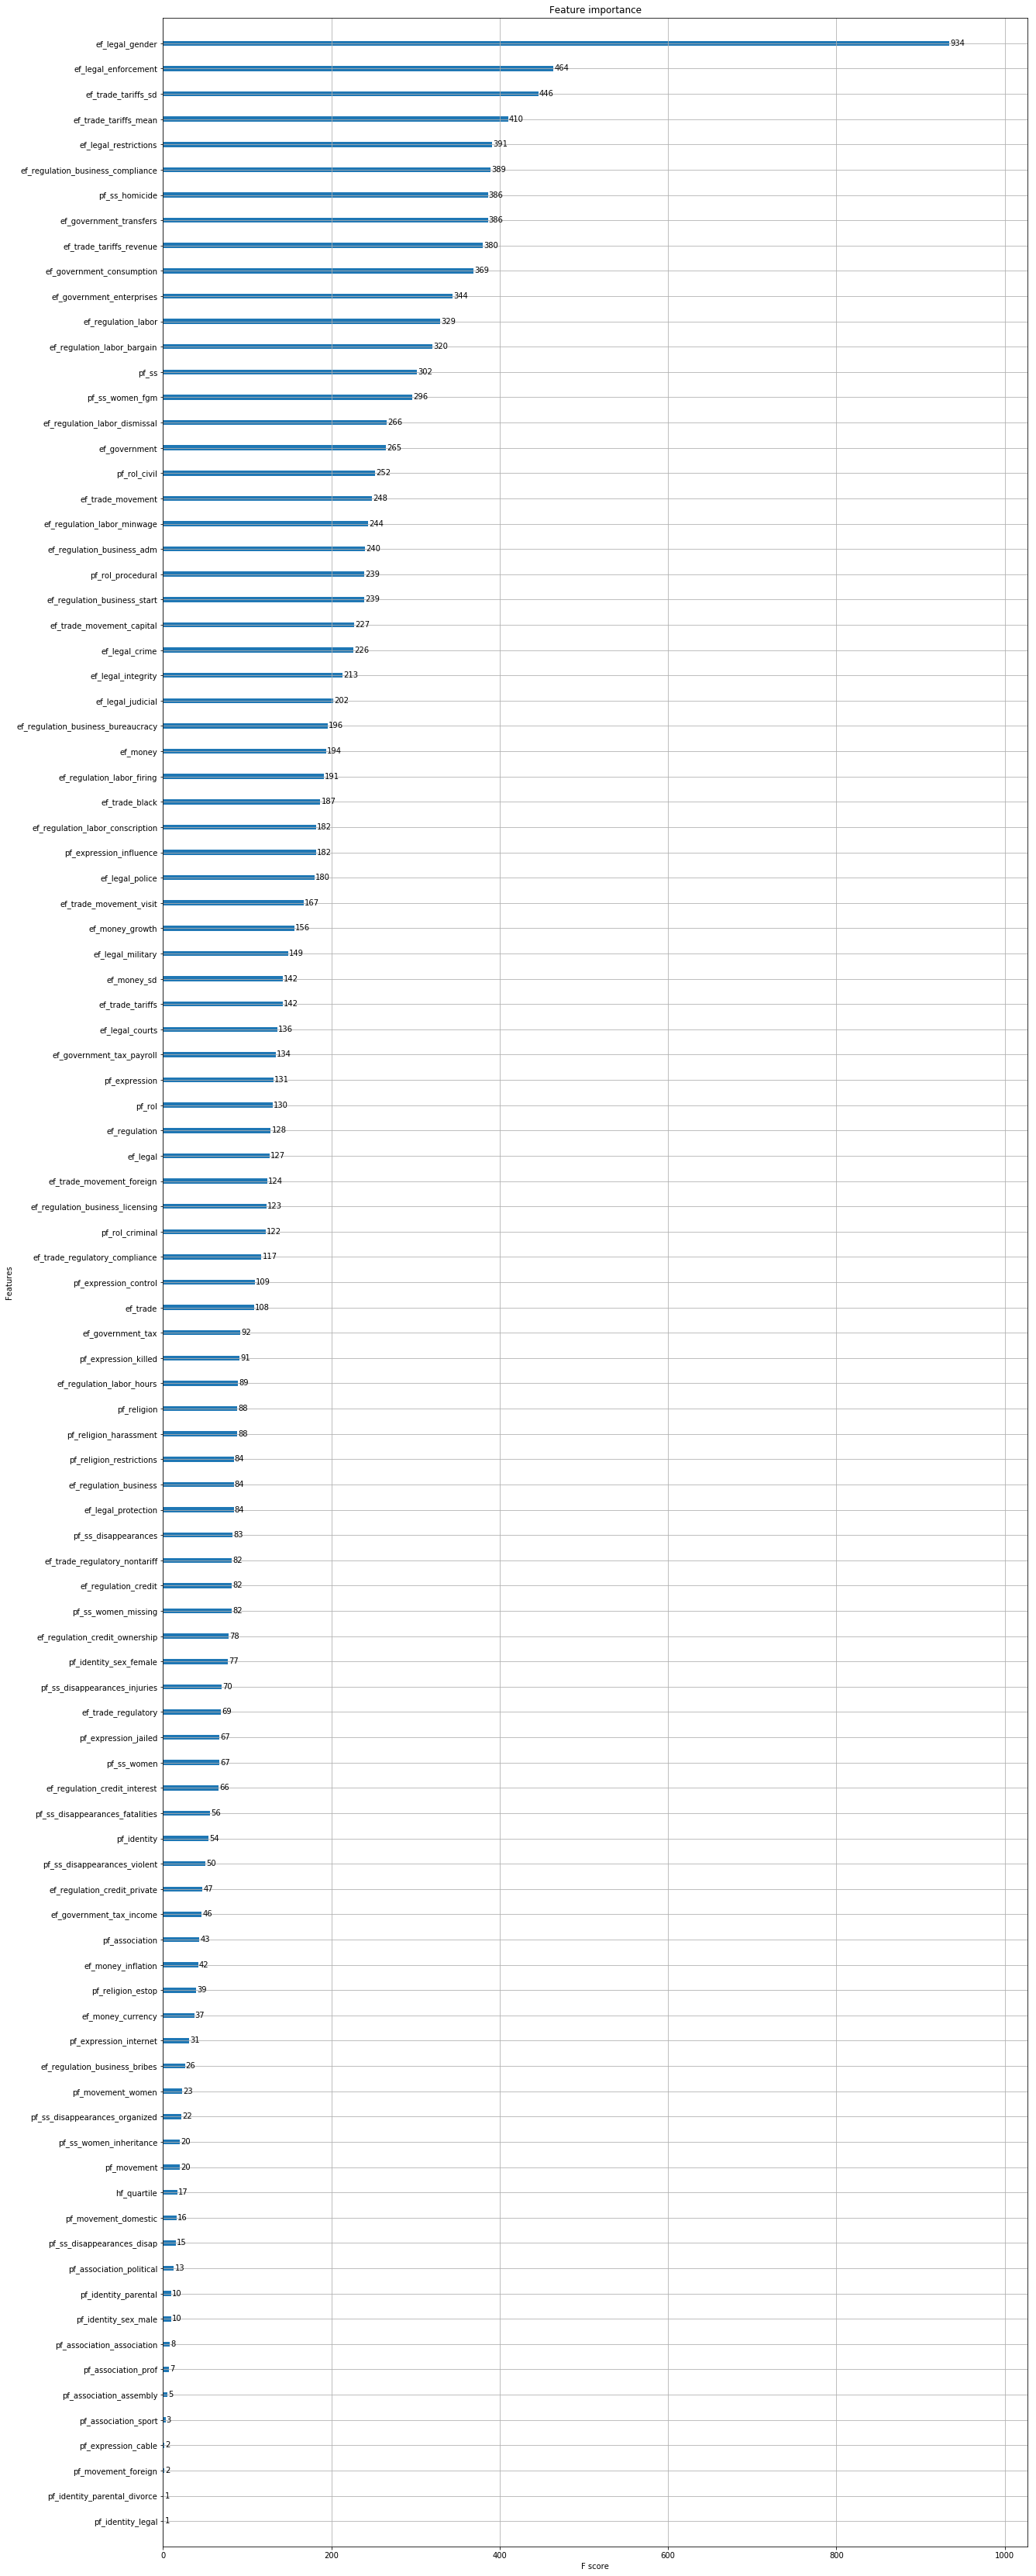

In [151]:
# plot feature importance using XGBoost built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

X = freedom_and_happiness.drop(columns=['year', 'ISO_code', 'Country', 'region','hf_score',
                              'hf_rank', 'ef_score', 'pf_score', 'ef_rank', 'pf_rank', 'Happiness score'
                              ]) #hf_no_nan_df.iloc[:,5:20]  #independent columns
y = freedom_and_happiness['Happiness score']#.iloc[:,3]    #target column i.e price range


# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.rcParams["figure.figsize"] = (20,60)
plt.show()

*****
*****

## SCORING MODELS, ROUND 1:

### Linear Regression Model + Score 
#### ~ Using SKLearn and Train/Test/Split ~
Import SKLearn models and reshape values to fit X/y model | Use train_test_split to split data into training and testing sets:

In [202]:
# import train_test_split and Linear Regression models:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

#### RESHAPE THE DATA:

In [203]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values...
# ...so we use reshape to create this
X = freedom_and_happiness[["ef_score", "pf_score", "hf_score"]]
y = freedom_and_happiness["Happiness score"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1206, 3) (1206, 1)


#### TRAIN-TEST-SPLIT:

In [204]:
# Use sklearn's 'train_test_split to split the data into training and testing
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=42)

#### SOME PRELIMINARY SCATTERPLOTS TO VIZUALIZE UN-TRAINED DATA:

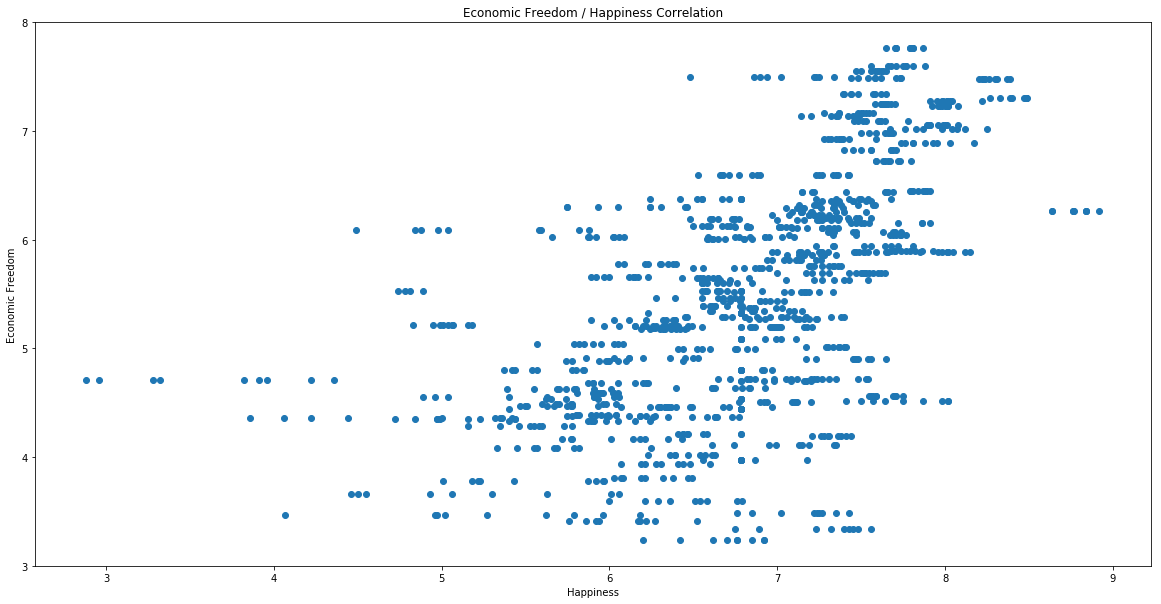

In [209]:
plt.scatter(X['ef_score'], y)
plt.title('Economic Freedom / Happiness Correlation')
plt.xlabel('Happiness')
plt.ylabel('Economic Freedom')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

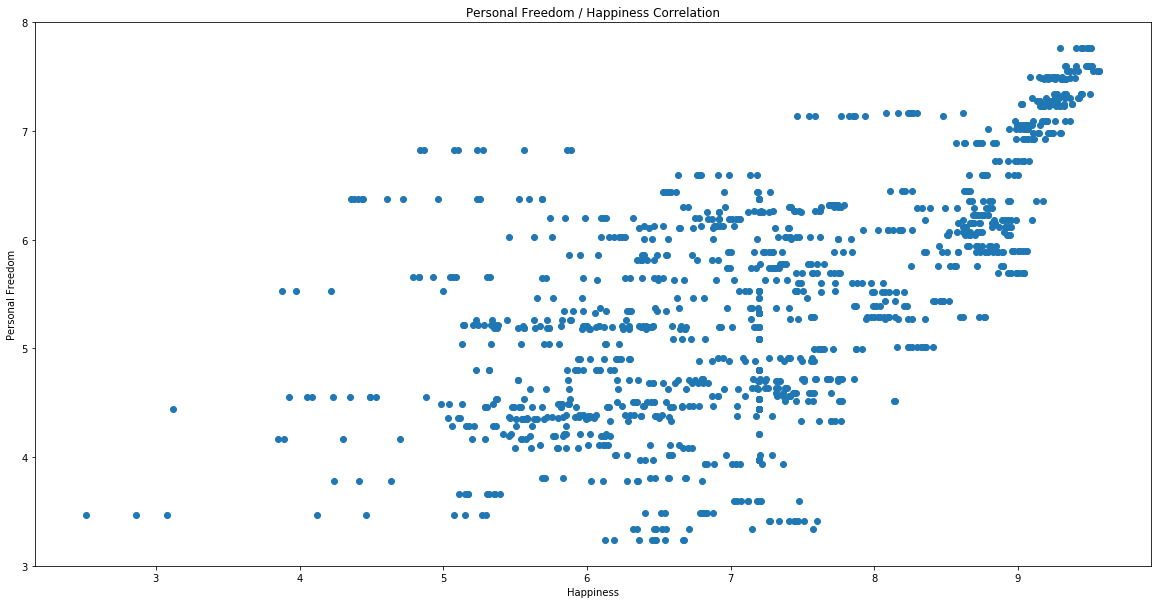

In [210]:
plt.scatter(X['pf_score'], y)
plt.title('Personal Freedom / Happiness Correlation')
plt.xlabel('Happiness')
plt.ylabel('Personal Freedom')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

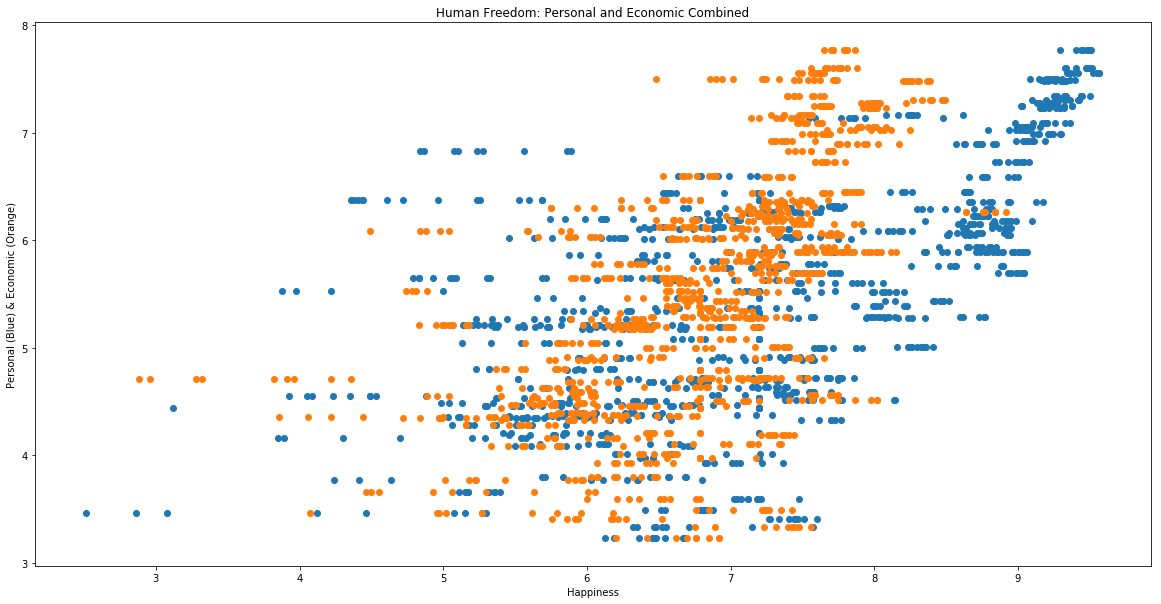

In [211]:
plt.scatter(X['pf_score'], y)
plt.xlabel('Happiness')
plt.ylabel('Personal Freedom')

plt.scatter(X['ef_score'], y)
plt.title('Human Freedom: Personal and Economic Combined')
plt.xlabel('Happiness')
plt.ylabel('Personal (Blue) & Economic (Orange)')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

### Plot the residuals for the training and testing data, to clarify: Is linear regression appropriate for this data?
If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

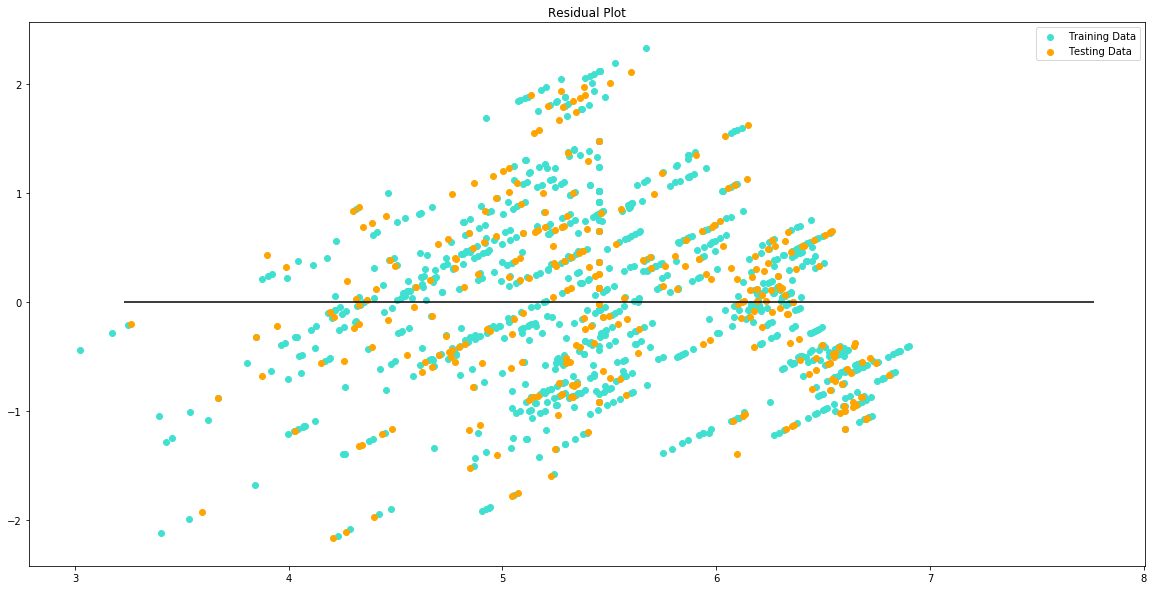

In [212]:
# Plot the Residuals for the Training and Testing data
# Shows the residuals on the vertical axis and the independent variable on the horizontal axis. 
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="turquoise", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

#### ANSWER: YES -- LINEAR REGRESSION IS APPROPRIATE!

SO NEXT: Fit model to the training data and calculate the scores:

## TRAINING AND TESTING THE DATA:

In [213]:
# testing score vs. training score: 
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4641304308674661
Testing Score: 0.46980650097659515


## SCORE: MSE AND R SQUARED:
https://data.library.virginia.edu/is-r-squared-useless/
Interesting note I found: R-squared can be arbitrarily close to 1 when the model is totally wrong. Again, the point being made is that R-squared does not measure goodness of fit. ... R-squared can be anywhere between 0 and 1 just by changing the range of X. We're better off using Mean Square Error (MSE) as a measure of prediction error.

In [217]:
# mean squared error vs. R squared:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f'MSE against the test data set is {mse}')
print(f'R squared against the test data set is {r2}')

MSE against the test data set is 0.6499784881232792
R squared against the test data set is 0.4472072190951729


## SCALE THE DATA:
### Scores on Linear Regression are OK...but could they improve if we scale the data?

In [239]:
### Scaling the X and y values and re-score:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Scale X:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Scale y:
Y_scaler = MinMaxScaler().fit(y_train.values.reshape(-1,1))
y_train_scaled = Y_scaler.transform(y_train.values.reshape(-1,1))
y_test_scaled = Y_scaler.transform(y_test.values.reshape(-1,1))

# repeat the linear regression: 
model = LinearRegression()
model.fit(X_train, y_train_scaled)
training_score_scaled = model.score(X_train, y_train_scaled)
testing_score_scaled = model.score(X_test, y_test_scaled)

print(f"Training Score (scaled y): {training_score_scaled}")
print(f"Testing Score (scaled y): {testing_score_scaled}")

Training Score (scaled y): 0.8098205729527982
Testing Score (scaled y): 0.7823787917258888


### (ANSWER: YES, SCALING IMPROVED THE SCORES!)

*****
*****

## SCORING MODELS, ROUND 2:

## Regression with Keras and TensorFlow
Starting fresh with the earlier saved dataframe

Article on how to do a regression problem in Keras:
https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
 
#### START WITH IMPORTING MODELS AND DATA (using csv saved earlier for a "fresh start")

In [240]:
import tensorflow
tensorflow.keras.__version__

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [241]:
keras_df = pd.read_csv('combined_data.csv')
keras_df.head()

,year,ISO_code,Country,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile,Happiness score
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0,4.719
1,2015,ALB,Albania,Eastern Europe,6.108121,4.802975,4.583263,5.164786,9.096927,10.0,...,7.324944,7.074366,6.733388,7.035655,7.53,34.0,7.558539,49.0,2.0,4.719
2,2014,ALB,Albania,Eastern Europe,5.569809,5.041787,4.302964,4.971520,8.397686,10.0,...,7.194431,5.998270,6.424354,6.954481,7.48,38.0,7.615083,47.0,2.0,4.719
3,2013,ALB,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,8.300775,10.0,...,7.194431,5.998270,6.244828,6.624514,7.27,53.0,7.389597,53.0,2.0,4.719
4,2012,ALB,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,7.849344,10.0,...,7.698494,5.998270,5.967623,6.619162,7.20,59.0,7.435191,54.0,2.0,4.719


In [242]:
# define X and y:
X = keras_df.drop(columns=['year', 'ISO_code', 'Country', 'region', 'Happiness score'])
y = keras_df['Happiness score']

print(X.shape, y.shape)

(1206, 111) (1206,)


#### SCALE THE DATA:

In [243]:
# Scale the data:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Scale our X:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Scale our y:
Y_scaler = MinMaxScaler().fit(y_train.values.reshape(-1,1))
y_train_scaled = Y_scaler.transform(y_train.values.reshape(-1,1))
y_test_scaled = Y_scaler.transform(y_test.values.reshape(-1,1))

#### CREATE A DEEP LEARNING MODEL USING THE TRAINED & SCALED DATA
• “model = Sequential()” for forward/back layering

• “Dense” to define our nodes


In [244]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# model using the shape of X
model.add(Dense(kernel_initializer='normal', units=100, activation='relu', input_dim=X_train.shape[1] ))#<--- X_train.shape is (rows,columns), so X_train.shape[1] is the # of columns, vs hard-coding: input_dim=120))

# In a regression problem, we only need one *1* output node which will have the quantitative result in it
# (vs classification problem , where we need one output node *for every class we're rying to predict*)

model.add(Dense(kernel_initializer='normal', units=y_train_scaled.shape[1])) #, softmax , I'm not sure it works on regression problems: activation='softmax'))

#### Model.summary prints a visual summary representation of the model:

In [245]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               11200     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


#### RUN A REGRESSION ON THE MODEL

In classification we would be scoring for accuracy, but since this is a regression we're scoring for "coefficient of determination" -- an R2 Score.

Keras does not support 'r2' as a string, so we need to write a function to make the conversion: https://stackoverflow.com/q/45250100/1175496

In [246]:
from keras import backend as K

# function to convert r2:
def det_coeff(y_true, y_pred):
    u = K.sum(K.square(y_true - y_pred))
    v = K.sum(K.square(y_true - K.mean(y_true)))
    return K.ones_like(v) - (u / v)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# model compile using mean_squared_error instead of categorical_crossentropy 
# and det_coeff instead of 'accuracy' (which is for classifications)
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[det_coeff])
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
904/904 [==============================] - 0s 184us/sample - loss: 0.1417 - det_coeff: -289.9104
Epoch 2/60
904/904 [==============================] - 0s 30us/sample - loss: 0.1417 - det_coeff: -287.0094
Epoch 3/60
904/904 [==============================] - 0s 29us/sample - loss: 0.1417 - det_coeff: -310.0183
Epoch 4/60
904/904 [==============================] - 0s 30us/sample - loss: 0.1417 - det_coeff: -278.5532
Epoch 5/60
904/904 [==============================] - 0s 30us/sample - loss: 0.1417 - det_coeff: -283.6786
Epoch 6/60
904/904 [==============================] - 0s 30us/sample - loss: 0.1417 - det_coeff: -280.3685
Epoch 7/60
904/904 [==============================] - 0s 29us/sample - loss: 0.1417 - det_coeff: -282.3862
Epoch 8/60
904/904 [==============================] - 0s 30us/sample - loss: 0.1417 - det_coeff: -289.5748
Epoch 9/60
904/904 [==============================] - 0s 30us/sample - loss: 0.1417 - det_coeff: -314.8218
Epoch 10/60
904/904 [===============

In [247]:
# quantify the trained model: 
model_loss, model_det_coeff = model.evaluate(
    X_test_scaled, y_test_scaled, verbose=1)

print(
    f"Loss: {model_loss}")
print(
    f"r2 Score: {model_det_coeff}")

302/302 [==============================] - 0s 508us/sample - loss: 0.1421 - det_coeff: -293.8521
Loss: 0.1420660244905396
r2 Score: -293.85205078125


### Plot the value changes using matplotlib:

We can plot the changes in value determined after each epoch. Results of calling "model.fit" can produce a "history" plot of the data.
https://keras.io/visualization/

Train on 904 samples, validate on 302 samples
Epoch 1/50
904/904 [==============================] - 0s 70us/sample - loss: 184.1503 - det_coeff: -22026.4160 - val_loss: 226.2212 - val_det_coeff: -19310.7344
Epoch 2/50
904/904 [==============================] - 0s 64us/sample - loss: 184.1503 - det_coeff: -21900.9258 - val_loss: 226.2212 - val_det_coeff: -19416.3809
Epoch 3/50
904/904 [==============================] - 0s 65us/sample - loss: 184.1503 - det_coeff: -21664.5996 - val_loss: 226.2212 - val_det_coeff: -19524.5703
Epoch 4/50
904/904 [==============================] - 0s 64us/sample - loss: 184.1503 - det_coeff: -21327.3438 - val_loss: 226.2212 - val_det_coeff: -19390.8008
Epoch 5/50
904/904 [==============================] - 0s 65us/sample - loss: 184.1503 - det_coeff: -22650.2344 - val_loss: 226.2212 - val_det_coeff: -18721.0508
Epoch 6/50
904/904 [==============================] - 0s 65us/sample - loss: 184.1503 - det_coeff: -22459.2988 - val_loss: 226.2212 - val_det_coeff: 

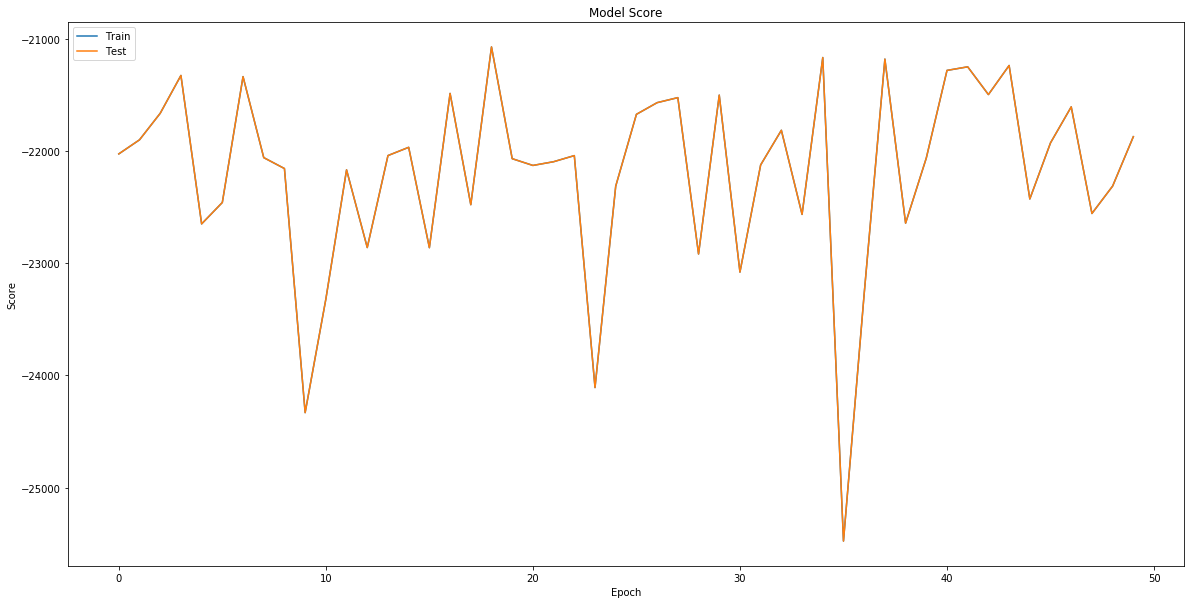

In [250]:
import matplotlib.pyplot as plt

history = model.fit(X, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation r2 values
plt.plot(history.history['det_coeff'])
plt.plot(history.history['det_coeff'])
plt.title('Model Score')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### ATTEMPT (not complete): CREATE A COLAB FORM FOR PREDICTION

In [252]:
#@title Can You Predict a Happiness Score?
ef_score = 2 #@param {type:"slider", min:0, max:5, step:1}
pf_score = 1 #@param {type:"slider", min:0, max:5, step:1}
hf_score = 1 #@param {type:"slider", min:0, max:5, step:1}
happiness_score = 'reveal output here?' #@param {type:"raw"}

# np.array([ef_score, pf_score, hf_score]).reshape(-1,3)